# Building a NN From Scratch Using Numpy and Tackling The MNIST Dataset

In [20]:
import numpy as np
import tensorflow as tf # For loading the MNIST dataset
import matplotlib.pyplot as plt

from PIL import Image 
from IPython.display import display

In [9]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

IMAGE_PATH = 'Images/'

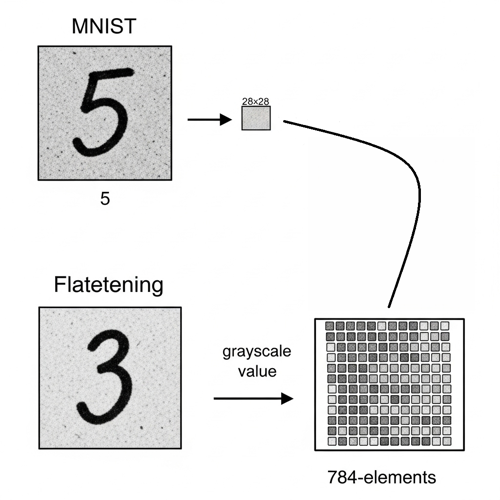

In [ ]:
# Our Dataset Overview

img = Image.open(IMAGE_PATH + "MNIST-Overview.png").resize((500, 500))
display(img)

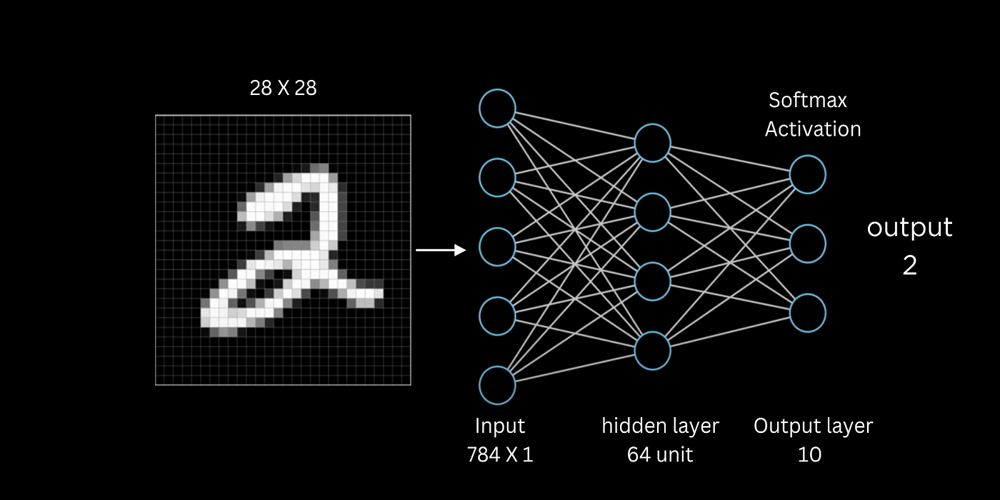

In [ ]:
# Steps that need to be taken:
# Make it into a matrix
# Transpose it
# Give it to the model
# Softmax it

# Sample Neural Network Architecture (Ours Would Be Like One Input One Hidden One Output)
img = Image.open(IMAGE_PATH + "Sample-NN.png").resize((1000, 500))
display(img)

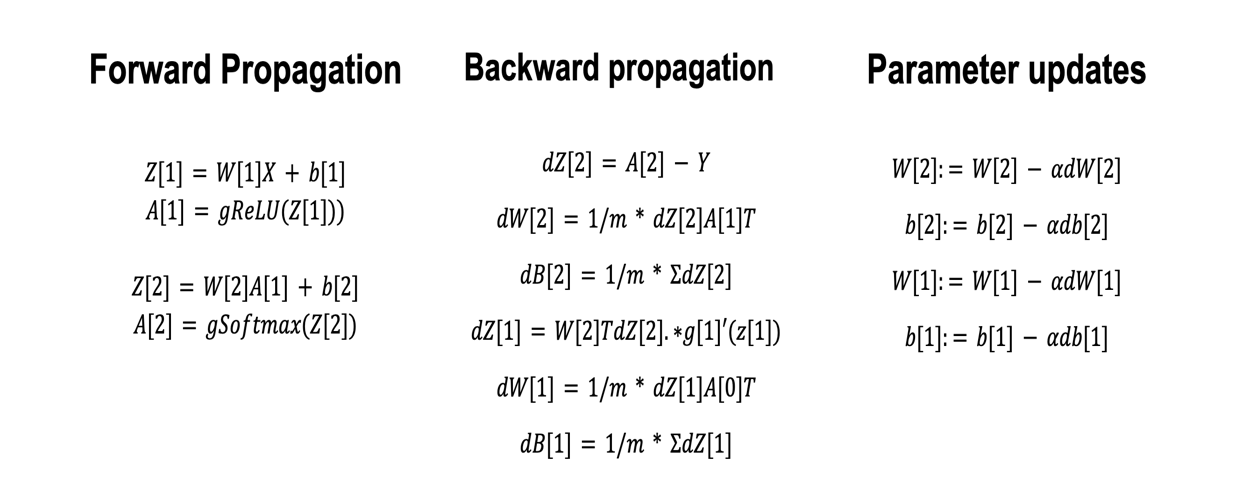

In [ ]:
# The math and the equations we will use then generalize it to a more complex model

img = Image.open(IMAGE_PATH + "Equations.png").resize((1250, 500))
display(img)

In [49]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

INSTANCES, FEATURES = X_train.shape[0] + X_test.shape[0], X_train.shape[1] * X_train.shape[2]
print(f"Instances: {INSTANCES}, Features: {FEATURES}")

# Reshape and normalize the data
X_train = X_train.reshape(X_train.shape[0], -1).T.astype(np.float32) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1).T.astype(np.float32) / 255.0

print(X_train.shape, X_test.shape)

Instances: 70000, Features: 784
(784, 60000) (784, 10000)


In [ ]:
class SimpleNeuralNetwork:
    def __init__(self):
        self.W1 = np.random.randn(10, FEATURES) - 0.5
        self.b1 = np.random.rand(10, 1) - 0.5
        self.W2 = np.random.randn(10, 10) - 0.5
        self.b2 = np.random.rand(10, 1) - 0.5

    @staticmethod
    def ReLU(Z):
        return np.maximum(Z, 0)

    @staticmethod
    def softmax(Z):
        A = np.exp(Z) / sum(np.exp(Z))
        return A

    def forward(self, X):
        self.Z1 = np.dot(self.W1, X) + self.b1
        self.A1 = self.ReLU(self.Z1)
        self.Z2 = np.dot(self.W2, self.A1) + self.b2
        return self.softmax(self.Z2)
